# TensorFlow

## Librerias

In [2]:
# librerias generales
import numpy as np
import pandas as pd
import json
import os
import random

# bases de datos
from sklearn import datasets
from scipy.io import loadmat

# preprocesamiento
from sklearn.model_selection import train_test_split

# modelos DL
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn import model_selection
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

# modelos pre-entrenados
from tensorflow.keras.models import clone_model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img



## Modelo Secuencial

In [120]:
# crear FeedForward NN 
# 1 capa escondida
# 1x63 neuronas, activacion 'relu', input_shape=1x784
nn1 = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

nn1

In [121]:
# crear nn secuencia
red1 = Sequential()

# agregar capas de red una por una 
red1.add(Flatten(input_shape=(28,28) , name='capa1'))
red1.add(Dense(16, activation='relu', name='capa2'))
red1.add(Dense(16, activation='relu', name='capa3'))
red1.add(Dense(16, activation='tanh', name='capa4'))
red1.add(Dense(10, activation='softmax', name='capa5'))

red1


In [122]:
# pesos (parametros) de la red neuronal
red1.weights

[<tf.Variable 'capa2/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-0.05511852,  0.07634808, -0.04418491, ..., -0.08259049,
         -0.07918743, -0.05810867],
        [-0.08625554,  0.07019119,  0.0591079 , ..., -0.01277544,
          0.00428523,  0.00184047],
        [-0.03363259,  0.04950964,  0.05421114, ...,  0.01524936,
         -0.07428242,  0.05647326],
        ...,
        [-0.03801413,  0.04745585,  0.04337333, ..., -0.07241157,
         -0.02042827, -0.06832071],
        [-0.04170258,  0.04169671,  0.08372016, ...,  0.07876903,
          0.05395687, -0.07808907],
        [ 0.07964209,  0.00812611,  0.03351228, ...,  0.08025116,
         -0.03155112, -0.02361806]], dtype=float32)>,
 <tf.Variable 'capa2/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'capa3/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[ 0.3900378 , -0.1591928 ,  0.42170778, -0.26950032,

In [123]:
# descripcion de modelo
red1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa1 (Flatten)             (None, 784)               0         
                                                                 
 capa2 (Dense)               (None, 16)                12560     
                                                                 
 capa3 (Dense)               (None, 16)                272       
                                                                 
 capa4 (Dense)               (None, 16)                272       
                                                                 
 capa5 (Dense)               (None, 10)                170       
                                                                 
Total params: 13274 (51.85 KB)
Trainable params: 13274 (51.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
# crear FeedForward NN 
nn2= Sequential()

# agregar capas una por una
nn2.add(Dense(64, activation='relu', input_shape=(784,)))
nn2.add(Dense(10, activation='softmax'))

nn2 

In [125]:
# crear FeedForward NN 
nn3= Sequential()

# agregar capas una por una
nn3.add(Flatten(input_shape=(28,28)))
nn3.add(Dense(64, activation='relu', input_shape=(784,)))
nn3.add(Dense(10, activation='softmax'))

nn3

In [126]:
# crear FeedForward NN 
nn4= Sequential()

# agregar capas
nn4.add(Dense(64, activation='relu', input_shape=(784,)))
nn4.add(Dense(10, activation='softmax'))

nn4 

## CNN: Redes Neuronales Convolucionales

In [127]:
#  crear CNN 
cnn1= Sequential()

# agregar capa de convolucion
cnn1.add(Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3))) # 30x30x16

# agregar capa de pooling
cnn1.add(MaxPooling2D(pool_size=(3,3))) # 10x10,16

# agregar capas
cnn1.add(Flatten()) # vector de 1 dimension # 1x1600
cnn1.add(Dense(64, activation='relu')) # 64
cnn1.add(Dense(10, activation='softmax')) # 10


cnn1.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001E686321C10>>

In [128]:
# crear nn 
cnn2 = Sequential()

# agregar capa convolucional
cnn2.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1) ))
# agregar capa pooling
cnn2.add(MaxPooling2D(pool_size=3))

# agregar capas 
cnn2.add(Flatten())
cnn2.add(Dense(10, activation='softmax'))

# descripcion de nn
cnn2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 dense_28 (Dense)            (None, 10)                10250     
                                                                 
Total params: 10410 (40.66 KB)
Trainable params: 10410 (40.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Inicializador de pesos y sesgos (bias)

In [129]:
# crear modelo
model1 = Sequential()

# agregar capa de convolucion
model1.add(Conv1D(filters = 16, kernel_size =3, input_shape = (128,64), kernel_initializer ='random_uniform', bias_initializer ='zeros', activation='relu'))

# agregar capa de pooling
model1.add(MaxPooling1D(pool_size =4))

# agregar capas
model1.add(Flatten())
model1.add(Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation= 'relu'))

# agregar capa densa con inicializadores
# kernel con distribucion RandomNormal u=0, sd=0.05
# sesgo (bias) constante = 0.4
# activacion relu
model1.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'),)



# agregar capa densa
# kernel con distribucion Ortogonal G=1
# sesgo (bias) constante = 0.4
# activacion relu
model1.add(Dense(8, 
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))


# resumen de modelo
model1.summary()



Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 126, 16)           3088      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 31, 16)            0         
 g1D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 496)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                31808     
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 8)                 520       
                                                     

In [130]:

# definir inicializador custom(personalizado)

def custom_init (shape, dtype=None):    
    return K.random_normal(shape, dtype=dtype)
    
model1.add(Dense(64, kernel_initializer=custom_init))
model1.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 126, 16)           3088      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 31, 16)            0         
 g1D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 496)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                31808     
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 8)                 520       
                                                     

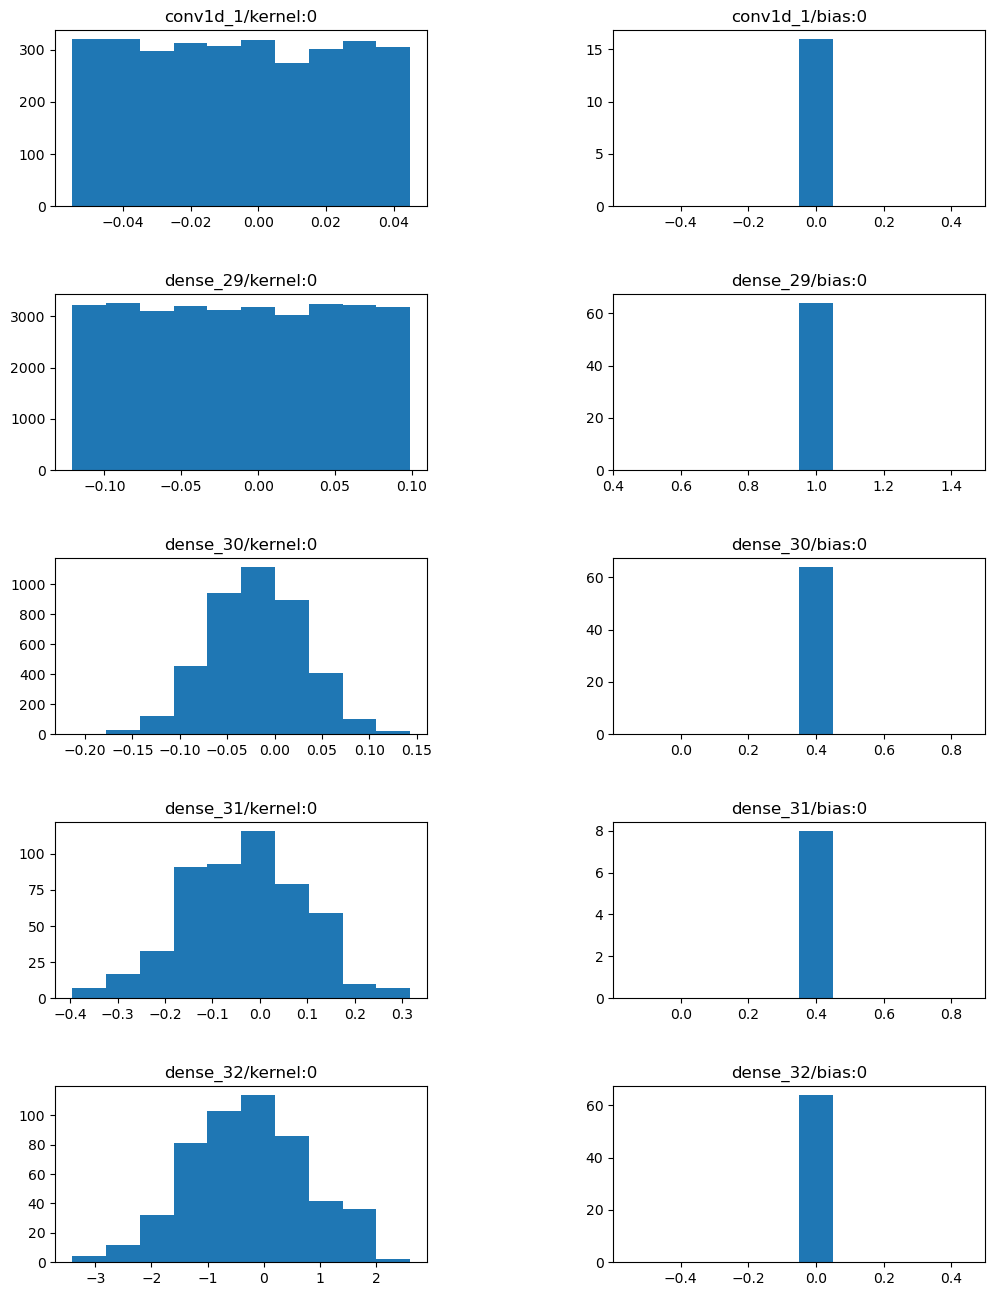

In [131]:
# Visualizacion de pesos y sesgo(bias) inicializados

# histogramas
fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# filtrar capas de pooling y flatten que no tienen pesos
weight_layers = [layer for layer in model1.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)



In [132]:
# compilar modelos
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

# compilar modelo

#  optimizer: Adam(learning_rate=0.005)
# loss function: 'cross_entropy'
# metricas de evaluacion: ['accuracy','recall','mae']

model1.compile(optimizer=opt,
               loss='cross_entropy',
               metrics=['accuracy','recall','mae'])

model1.summary()     


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 126, 16)           3088      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 31, 16)            0         
 g1D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 496)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                31808     
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 8)                 520       
                                                     

## Métricas de Evaluacion

In [133]:
# crear modelo Secuencial

# agregar capas
# Flatten: tamaño entrada 28x28
# Densa: 32, activacion='relu'
# Densa: 32, activacion='relu'
# Densa: 10, activacion='softmax'
 
model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(32, activation='relu'),
  Dense(32, activation='tanh'),
  Dense(10, activation='softmax'),
])

model

In [134]:
# compilar modelo

# optimizer='adam'
# loss function = 'sparse_categorical_crossentropy'
# metricas de evaluacion = 'accuracy'
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

# optimizer='adam'
# loss function = 'sparse_categorical_crossentropy'
# metricas de evaluacion = 'binary_accuracy'
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['binary_accuracy'])

# optimizer='adam'
# loss function = 'sparse_categorical_crossentropy'
# metricas de evaluacion = BinaryAccuracy, threshold=0.5 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)])



In [135]:
# compilar modelo

#  optimizer: 'adam'
# loss function: sparse_categorical_crossentropy
# metricas de evaluacion: sparse_categorical_accuracy 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["sparse_categorical_accuracy"])

#  optimizer: 'adam'
# loss function: sparse_categorical_crossentropy
# metricas de evaluacion: SparseCategoricalAccuracy

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [136]:
# compilar modelo

#  optimizer: 'adam'
# loss function: sparse_categorical_crossentropy
# metricas de evaluacion: top-k categorical accuracy 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["top_k_categorical_accuracy"])

#  optimizer: 'adam'
# loss function: sparse_categorical_crossentropy
# metricas de evaluacion: SparseTopKCategoricalAccuracy(k=3)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3)])

### Metricas Personalizadas

In [137]:
# definir metricas de evaluación personalizadas

# metrica de evaluación custom: mean/promedio
# parametros: y_true (observaciones reales), y_pred (predicciones)
def custom_mean(y_true, y_pred):
    return K.mean(y_pred)

# compilar modelo
# optimizer='adam'
# loss function: sparse_categorical_crossentropy
# métrica de evaluación: custom_mean (personalizada)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[custom_mean])

# múltiples métricas de evaluación
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[custom_mean, 'accuracy', tf.metrics.SparseTopKCategoricalAccuracy(k=3) ]
) 


In [138]:
# compilar modelo

# optimizer: 'adam'
# loss: 'mean_squared_error'
# metricas de evaluación: MeanSquaredError, AUC
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        tf.metrics.MeanSquaredError(),
        tf.metrics.AUC(),
    ]
)


In [139]:
# compilar modelo

# optimizer: 'adam'
# loss: 'mean_squared_error'
# metricas de evaluación:  custom_mse, custom_auc
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        tf.metrics.MeanSquaredError(name='custom_mse'),
        tf.metrics.AUC(name='custom_auc'),
    ]
)

In [140]:
# compilar modelo

# optimizer: 'adam'
# loss: 'mean_squared_error'
# metricas de evaluación:  custom_mse, custom_auc

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        'MeanSquaredError',
        'AUC',
    ]
)

In [141]:

# definir parametros para compilar el modelo
accuracy = tf.keras.metrics.CategoricalAccuracy()
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

# iterar sobre batches de base de datos
for step, (x, y) in enumerate(dataset):
    with tf.GradientTape() as tape:
        logits = model(x)
        
        # calcular loss function 
        loss_value = loss_fn(y, logits)

    # actualizar estado de métrica accuracy
    accuracy.update_state(y, logits)
    
    # actualizar pesos(parametros) de modelo para minimizar funcion de perdidas
    gradients = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    # Logging the current accuracy value so far.
    if step % 100 == 0:
        print('Step:', step)        
        print('Total running accuracy so far: %.3f' % accuracy.result())
        


NameError: name 'dataset' is not defined

In [ ]:

# metrica custom: diferencia al cuadrado
def custom_sqrtdiff(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`

# compilar modelo
# optimizer: 'adam'
# loss function: 'mean_squared_error'
# metrics: custom_sqrtdiff
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[custom_sqrtdiff])

## Entrenamiento 



In [ ]:
# crear red neuronal
red1 = Sequential()

# agregar capa convolucional
red1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28,28,1)))

# agregar capa de pooling
red1.add(MaxPooling2D((3,3)))

# agregar capas
red1.add(Flatten())
red1.add(Dense(10, activation='softmax'))

red1.summary()


In [ ]:
# compilar modelo

# definir parametros de compilar
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

# compilar modelo

red1.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy', 
             metrics=[acc, mae])


red1.summary()


In [ ]:
# cargar bases de datos
data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()


In [ ]:
# datos de entrenamiento
train_images, train_labels
train_images.shape


x_train = train_images
y_train = train_labels

x_test = test_images
y_test = test_labels


In [ ]:
# definir etiquetas (clases)
etiquetas = [
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
etiquetas 

In [ ]:
# preprocesamiento

# escalar imagenes a valores entre 0-1}
x_train  = x_train /255.
x_test = x_test /255.

In [ ]:
# entrenar modelo con train-set
aprendizaje = red1.fit(x_train[..., np.newaxis], y_train, epochs=8, batch_size=256, verbose=2)

In [ ]:
# plot curva de aprendizaje en entrenamiento
aprendizaje_df = pd.DataFrame(aprendizaje.history)


loss_plot =  aprendizaje_df.plot(y='loss', title= 'Loss vs. Epochs', legend = False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')
              


## Evaluación de modelo

In [ ]:
# metricas de evaluacion de modelo
mean, sc_acc,mae = red1.evaluate(x_test, y_test)
print('Mean: ', mean)
print('SparseCategorical Accuracy: ', sc_acc)
print('MAE: ', mae)

# crear predicciones 
y_pred = red1.predict(x_test)    


In [ ]:
# escoger imagen random de test-set
random_inx = np.random.choice(x_test.shape[0])
#inx = 30

test_image = x_test[random_inx]
plt.imshow(test_image)
plt.show()

print('Etiqueta: ', etiquetas[y_test[random_inx]] )


In [ ]:
y_pred = red1.predict(test_image[np.newaxis,...,np.newaxis])
y_pred

print('Predicción: ', etiquetas[np.argmax(y_pred)] )

## CNN Clasificador de imagenes de digitos a mano

* CNN clasificador multi clase de imagenes a mano para 10 clases
* Base de datos MNIST

### cargar datos

In [58]:
# cargar datos
data = tf.keras.datasets.mnist

# separar base de datos en train-set(ajustar parametros) y test-set(evaluar modelo)

(x_train, train_labels), (x_test, test_labels) = data.load_data()
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Preprocesamiento

* Escalar/estandarizar train-set y test-set
* Agregar dimensión dummy 

In [59]:
# escalar/estandarizar x_train, x_test en rango [0-1]
def scale_mnist_data(train_images, test_images):
    
    # Reshape  y normalizar x_train y x_test
    x_train_scaled = train_images / 255.0
    x_test_scaled = test_images / 255.0
    
    return (x_train_scaled, x_test_scaled)

(scaled_train_images, scaled_test_images) = scale_mnist_data(x_train, x_test)
scaled_train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [60]:
# Add a dummy channel dimension
# agregar dimension 'dummy'
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]
scaled_train_images.shape 

(60000, 28, 28, 1)

### Modelo CNN

In [ ]:

# crear CNN  (Sequential)

# capas:
# (input)convolucional:  input_shape=input_shape=(28, 28, 1), convolucion 3x3, 8 filtros, activation='relu'

# pooling: ventana 2x2 
# Flatten: (1,N)
# Dense: 2 capas  1x64

# (output) Dense: 1 capa 1x10 (clases)
 
def get_model(input_shape):

    cnn_digit = Sequential() # crear modelo secuencial
    
    # agregar capa convolucional
    # input_shape= input_shape=(28, 28, 1)
    # convolucion 3x3, 8 filtros, activation='relu'
     
    cnn_digit.add(Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))

    # agregar capa de pooling
    # 2x2 ventana
    cnn_digit.add(MaxPooling2D( pool_size=(2, 2)))

    # agregar capas
    cnn_digit.add(Flatten()) # (1,N)
    cnn_digit.add(Dense(64, activation='relu')) # 1x64
    cnn_digit.add(Dense(64, activation='relu')) # 1x64

    # capa de salida (clases)
    cnn_digit.add(Dense(10, activation='softmax')) # 1x10

    cnn_digit.summary()
    
    return cnn_digit

cnn_digit = get_model(scaled_train_images[0].shape)

### Entrenamiento

In [ ]:
# compilar CNN
def compile_model(model):
    
    # definir parametros de compilar
    opt = tf.keras.optimizers.Adam()
    #acc = tf.keras.metrics.SparseCategoricalAccuracy()

    # compilar modelo
    model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
    model.summary()


compile_model(cnn_digit)

In [ ]:
# entrenar/ajustar modelos con train-set
def train_model(model, scaled_train_images, train_labels):
    # entrenar modelo con train-set
    aprendizaje = model.fit(scaled_train_images[..., np.newaxis], train_labels, epochs=5, batch_size=256, verbose=2)

    # DataFrame aprendizaje de modelo en entrenamiento
    aprendizaje_df = pd.DataFrame(aprendizaje.history)
    print(aprendizaje_df)
    return aprendizaje 

history = train_model(cnn_digit, scaled_train_images, train_labels)


### Curvas de Aprendizaje

In [ ]:
# DataFrame de aprendizaje de modelo
frame = pd.DataFrame(history.history)
frame

In [ ]:
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

In [ ]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

### Evaluación

In [ ]:

def evaluate_model(model, scaled_test_images, test_labels):
    # metricas de evaluacion de modelo
    loss, acc = model.evaluate(scaled_test_images, test_labels)
    print(f"Test loss: {loss}")
    print(f"Test accuracy: {acc}")
    
    return loss, acc

test_loss, test_accuracy = evaluate_model(cnn_digit, scaled_test_images, test_labels)


### Predicciones


In [ ]:

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

## Validación

### Cargar bases de datos

In [ ]:
# cargar bases de datos

from sklearn.datasets import load_diabetes

data  = load_diabetes()



In [ ]:
# definir x variables, y dependiente
x = data['data']
y = data['target']


### Preprocesamiento

* Normalizar y target(dependiente)

In [ ]:
# normalizar  y
y = (y - y.mean(axis=0))/ y.std()
y

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

### Separar bases de datos:

* train-set: entrenar/ajustar modelos
* validation-set: sintonizar parámetros y selección de modelo
* test-set: evaluar modelo final 

In [ ]:
# separar x, y en train-set y test-set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))
print('')

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


397 397
45 45

(397, 10) (397,)
(45, 10) (45,)


### Modelo MLP



In [ ]:
def get_model():
    
    model = Sequential() # crear modelo Sequential NN
    
    # input layer: 128, activation='relu', input_shape=(x_train.shape[1],)
    model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],) ))
    
    # agregar capas 
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    
    # output layer: 1
    model.add(Dense(1))
    
    model.summary()
    
    return model
get_model()

    

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 128)               1408      
                                                                 
 dense_205 (Dense)           (None, 128)               16512     
                                                                 
 dense_206 (Dense)           (None, 128)               16512     
                                                                 
 dense_207 (Dense)           (None, 128)               16512     
                                                                 
 dense_208 (Dense)           (None, 128)               16512     
                                                                 
 dense_209 (Dense)           (None, 128)               16512     
                                                                 
 dense_210 (Dense)           (None, 1)               

In [ ]:
# compilar modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


### Entrenamiento y Evaluación


In [ ]:
# entrenar/ajustar pesos del modelo
aprendizaje = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64, verbose=False)


In [ ]:
model.evaluate(x_test, y_test, verbose=2)

2/2 - 1s - loss: 0.7390 - mae: 0.6729 - 507ms/epoch - 254ms/step


[0.738950788974762, 0.6729118824005127]

## Regularización


In [ ]:
# crear modelo FF nn
model_reg = Sequential()

# agregar capas
model_reg.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
#model_reg.Dropout(0.5)
model_reg.add(Dense(1))

# compilar modelo
# optimizer='adadelta'
# loss function=  'binary_crossentropy'
# metrica de evaluacion = accuracy
model_reg.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# entrenar modelo
model_reg.fit(x_train, y_train, validation_split=0.25)

# evaluar modelo
model_reg.evaluate(x_test, y_test)

# predicciones
model_reg.predict(x_test)

print('Métricas de evaluación: ', model_reg.evaluate(x_test, y_test))



2/2 [==============================] - 0s 9ms/step - loss: 0.5829 - accuracy: 0.0000e+00
Métricas de evaluación:  [0.582920491695404, 0.0]


In [ ]:
def get_reg_model(weight_decay, drop_rate):
    
    model = Sequential() # crear modelo Sequential NN
    
    # capa Dropout aplica regularizacion de modelo, parametro: drop_rate
    # kernel_regularizer: weight_decay
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dropout(drop_rate))
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
    model.add(Dropout(drop_rate))
    model.add(Dense(1))
    
    model.summary()
    
    return model

get_reg_model(1e-5, 0.3)


In [ ]:
# compilar modelo
# parametros: optimizer='adam', loss function='mse', evaluacion='mae'
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [ ]:
# entrenamiento
aprendizaje_reg = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64, verbose=0)



In [ ]:
# evaluar modelo
model.evaluate(x_test, y_test, verbose=2)

## Batch Normalisation


### Cargar bases de datos

In [ ]:
# cargar bases de datos diabetes

from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()

### Definir x variables, y dependiente

In [ ]:
x = diabetes_dataset['data']
y = diabetes_dataset['target']

### Preprocesamiento

* Normalizar bases de datos
* dividir bases de datos en train(entrenamiento/ajuste), test(evaluacion de modelos)



In [ ]:
# normalizar y 
y = (y- y.mean(axis=0))/ (y.std())
y


array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [ ]:
# separar bases de datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train

array([[ 0.04170844,  0.05068012,  0.07139652, ...,  0.03430886,
         0.07341008,  0.08590655],
       [ 0.00175052,  0.05068012,  0.02612841, ...,  0.03430886,
         0.00943641,  0.00306441],
       [-0.02730979,  0.05068012, -0.01590626, ..., -0.03949338,
        -0.02364456,  0.01134862],
       ...,
       [-0.02004471, -0.04464164, -0.046085  , ..., -0.03949338,
        -0.05140054, -0.04664087],
       [ 0.04170844,  0.05068012, -0.01482845, ..., -0.00185424,
        -0.01190068,  0.00306441],
       [ 0.04534098, -0.04464164, -0.00620595, ...,  0.03430886,
         0.03243323, -0.0052198 ]])

### Entrenamiento


In [ ]:

# construir FF nn Sequential, con regularización Dropout y BatchNormalization
model = Sequential([
    
    # input layer: 64 neuronas, input_shape=[x_train.shape[1],], activation="relu"
    Dense(64, input_shape=[x_train.shape[1],], activation="relu"),
    BatchNormalization(),  # Batch normalisation layer
    Dropout(0.5), #  Dropout  drop_rate= 0.5
    BatchNormalization(),  #  Batch normalisation layer
    Dropout(0.5),
    Dense(256, activation='relu'),
])

model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x00000240B236E130>>

In [ ]:
# agregar capa BatchNormalization personalizada

# capa regularización:  BatchNormalization
# parametros:momentum=0.95, epsilon=0.005, axis = -1, beta_initializer, gamma_initializer
model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, 
    epsilon=0.005,
    axis = -1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
    gamma_initializer=tf.keras.initializers.Constant(value=0.9)
))

In [ ]:
# agregar capa de salida 1 x N
model.add(Dense(1))

In [ ]:
# compilar modelo
# parametros: optimizer='adam', loss function = 'mse', evaluacion = 'mae'
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [ ]:
# entrenar/ajustar modelo
# parametros: epochs=100, validation_split=0.15, batch_size=64

history = model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=False)

### Curvas de Aprendizaje

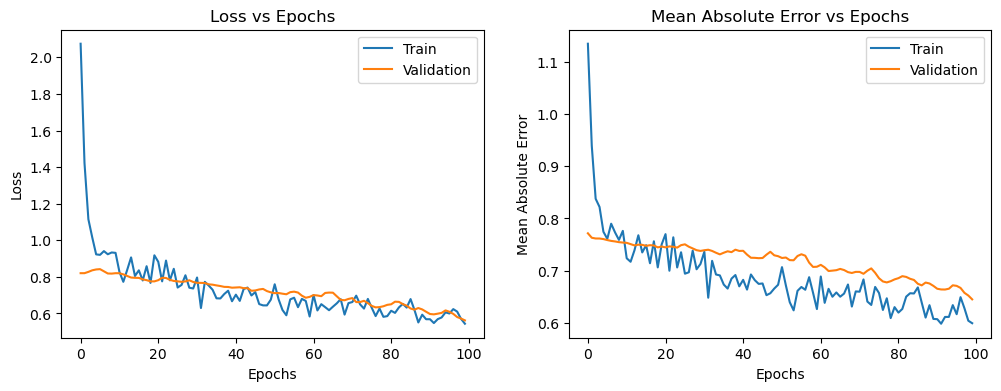

In [ ]:
frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

## Callbacks

Monitorear función de pérdidas (loss) y métricas de evaluación 

In [ ]:
# construir modelo FF nn Sequential

model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

model



In [ ]:

# definir CallBacks

# callbacks en entrenamiento
class TrainingCallBack(Callback):
    
    def on_train_begin(self, logs= None):
        print('Starting training...')
    
    def on_epoch_begin(self, epoch, logs= None):
        print('Starting epoch: ', epoch)
        
    def on_train_batch_begin(self, batch , logs= None):
        print('Starting batch:', batch)

    def on_train_batch_end(self, batch, logs= None):
        print('End batch...')  
        
    def on_epoch_end(self, epoch, logs= None):
        print('End epoch...')
        
    def on_train_end(self, logs= None):
        print('End training...')
        
# callbacks en evaluación
class TestingCallBack(Callback):
    
    def on_test_begin(self, logs= None):
        print('Starting testing...')
        
    def on_test_batch_begin(self, batch , logs= None):
        print('Starting batch:', batch)

    def on_test_batch_end(self, batch, logs= None):
        print('End batch...')  
          
    def on_test_end(self, logs= None):
        print('End testing...')
        
        
# callbacks en predicción
class PredictionCallBack(Callback):
    
    def on_predict_begin(self, logs= None):
        print('Starting prediction...')
        
    def on_predict_batch_begin(self, batch , logs= None):
        print('Starting prediction: batch:', batch)

    def on_prediction_batch_end(self, batch, logs= None):
        print('End prediction: batch...')  
          
    def on_prediction_end(self, logs= None):
        print('End prediction...')
        


In [ ]:
# construir reg model
model_reg = get_reg_model(1e-5, 0.3)

# compilar modelo
model_reg.compile(optimizer='adam', loss='mae')

# entrenar modelo
model_reg.fit(x_train, y_train, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallBack()])

# evaluar modelo
model_reg.evaluate(x_test, y_test, verbose=False, callbacks=[TestingCallBack()])

# predicciones

model_reg.predict(x_test, verbose=False, callbacks=[PredictionCallBack()])

 

In [ ]:

# construir modelo FF nn con BatchNormalization(regularizacion)

model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

# compilar modelo
# función de pérdidas (loss)= 'mse'
# optimizer = 'adam'
# métricas de evaluación= 'mae'
model.compile(loss='mse', optimizer="adam", metrics=['mae'])


In [ ]:
# crear Callback personalizada

class LossAndMetricCallback(tf.keras.callbacks.Callback):
    
    # Print the loss after every second batch in the training set
    def on_train_batch_end(self, batch, logs=None):
        if batch %2 ==0:
            print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
    
    # Print the loss after each batch in the test set
    def on_test_batch_end(self, batch, logs=None):
        print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))

    # Print the loss and mean absolute error after each epoch
    def on_epoch_end(self, epoch, logs=None):
        print('Epoch {}: Average loss is {:7.2f}, mean absolute error is {:7.2f}.'.format(epoch, logs['loss'], logs['mae']))
    
    # Notify the user when prediction has finished on each batch
    def on_predict_batch_end(self,batch, logs=None):
        print("Finished prediction on batch {}!".format(batch))



In [ ]:
# entrenar modelo
history = model.fit(x_train, y_train, epochs=20,
                    batch_size=100, callbacks=[LossAndMetricCallback()], verbose=False)

In [ ]:
# evaluar modelo 
model_eval = model.evaluate(x_test, y_test, batch_size=10, 
                            callbacks=[LossAndMetricCallback()], verbose=False)

In [ ]:
# predicciones
model_pred = model.predict(test_data, batch_size=10,
                           callbacks=[LossAndMetricCallback()], verbose=False)

In [ ]:

# definir tasa de aprendizaje 
# tuplas (start_epoch, new_learning_rate)
lr_schedule = [ (4, 0.03), (7, 0.02), (11, 0.005), (15, 0.007)]

def get_new_epoch_lr(epoch, lr):
    # Checks to see if the input epoch is listed in the learning rate schedule 
    # and if so, returns index in lr_schedule
    epoch_in_sched = [i for i in range(len(lr_schedule)) if lr_schedule[i][0]==int(epoch)]
    if len(epoch_in_sched)>0:
        # If it is, return the learning rate corresponding to the epoch
        return lr_schedule[epoch_in_sched[0]][1]
    else:
        # Otherwise, return the existing learning rate
        return lr

In [ ]:

# definir Callback personalizada con tasa de aprendizaje
class LRScheduler(tf.keras.callbacks.Callback):
    
    def __init__(self, new_lr):
        super(LRScheduler, self).__init__()
        # atributo: nueva tasa de aprendizaje
        self.new_lr = new_lr

    def on_epoch_begin(self, epoch, logs=None):
        # Make sure that the optimizer we have chosen has a learning rate, and raise an error if not
        if not hasattr(self.model.optimizer, 'lr'):
              raise ValueError('Error: Optimizer does not have a learning rate.')
                
        # tasa de aprendizaje actual
        curr_rate = float(tf.keras.backend.get_value(self.model.optimizer.lr))

        # obtener tasa de aprendizaje para el epoch actual
        scheduled_rate = self.new_lr(epoch, curr_rate)

        # set tasa de aprendizaje actual
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_rate)
        print('Learning rate for epoch {} is {:7.3f}'.format(epoch, scheduled_rate))

In [ ]:
# construir modelo
new_model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

In [ ]:
# compilar modelo
# función pérdidas (loss) = 'mse'
# optimizer = 'adam'
# métricas de evaluación = 'mae', 'mse'
new_model.compile(loss='mse',
                optimizer="adam",
                metrics=['mae', 'mse'])

In [ ]:
# entrenar modelo
new_history = new_model.fit(train_data, train_targets, epochs=20,
                            batch_size=100, callbacks=[LRScheduler(get_new_epoch_lr)], verbose=False)

### Early Stopping

Monitorear función de pérdidas (loss) , métricas de evaluación en cada epoch y termina el entrenamiento (regularización)

In [ ]:
# consutrir modelo sin regularizacion
model_noreg = get_model()

# compilar modelo
model_noreg.compile(optimizer='adam', loss='mse')

# entrenar modelo
history = model_noreg.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping()])

# evaluar modelo
model_noreg.evaluate(x_test, y_test)


Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_228 (Dense)           (None, 128)               1408      
                                                                 
 dense_229 (Dense)           (None, 128)               16512     
                                                                 
 dense_230 (Dense)           (None, 128)               16512     
                                                                 
 dense_231 (Dense)           (None, 128)               16512     
                                                                 
 dense_232 (Dense)           (None, 128)               16512     
                                                                 
 dense_233 (Dense)           (None, 128)               16512     
                                                                 
 dense_234 (Dense)           (None, 1)               

In [ ]:

# construir modelo regularizado
reg_model = get_reg_model(1e-5, 0.2)

# compilar modelo regularizado
reg_model.compile(optimizer='adam', loss='mse')

# entrenamiento
history_reg = reg_model.fit(x_train, y_train, epochs=100, validation_split=0.15, batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping()])

# evaluar modelo
reg_model.evaluate(x_test, y_test, verbose=2)




In [ ]:
# crear modelo Sequential 

model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

model.summary()

# compilar modelo
model.compile(loss='mse',
                optimizer="adam",metrics=["mse","mae"])



Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 128)               1408      
                                                                 
 dense_241 (Dense)           (None, 64)                8256      
                                                                 
 dense_242 (Dense)           (None, 64)                4160      
                                                                 
 dense_243 (Dense)           (None, 64)                4160      
                                                                 
 dense_244 (Dense)           (None, 1)                 65        
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# definir función de tasa de aprendizaje schedule
def lr_function(epoch, lr):
    if epoch % 2 == 0:
        return lr
    else:
        return lr + epoch/1000

In [ ]:
# entrenar modelo
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_function, verbose=1)], verbose=False)



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.

Epoch 2: LearningRateScheduler setting learning rate to 0.0020000000474974513.

Epoch 3: LearningRateScheduler setting learning rate to 0.0020000000949949026.

Epoch 4: LearningRateScheduler setting learning rate to 0.005000000094994903.

Epoch 5: LearningRateScheduler setting learning rate to 0.004999999888241291.

Epoch 6: LearningRateScheduler setting learning rate to 0.009999999888241292.

Epoch 7: LearningRateScheduler setting learning rate to 0.009999999776482582.

Epoch 8: LearningRateScheduler setting learning rate to 0.01699999977648258.

Epoch 9: LearningRateScheduler setting learning rate to 0.016999999061226845.

Epoch 10: LearningRateScheduler setting learning rate to 0.025999999061226846.


In [ ]:
# entrenar modelo con LearningRateScheduler con funcion lambda
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda x:1/(3+5*x), verbose=1)], 
                    verbose=False)


Epoch 1: LearningRateScheduler setting learning rate to 0.3333333333333333.

Epoch 2: LearningRateScheduler setting learning rate to 0.125.

Epoch 3: LearningRateScheduler setting learning rate to 0.07692307692307693.

Epoch 4: LearningRateScheduler setting learning rate to 0.05555555555555555.

Epoch 5: LearningRateScheduler setting learning rate to 0.043478260869565216.

Epoch 6: LearningRateScheduler setting learning rate to 0.03571428571428571.

Epoch 7: LearningRateScheduler setting learning rate to 0.030303030303030304.

Epoch 8: LearningRateScheduler setting learning rate to 0.02631578947368421.

Epoch 9: LearningRateScheduler setting learning rate to 0.023255813953488372.

Epoch 10: LearningRateScheduler setting learning rate to 0.020833333333333332.


In [ ]:
# entrenar modelo con Callback que guarda cada epoch en archivo .csv
# Train the model with a CSV logger

history_csv = model.fit(x_train, y_train, epochs=10,
                    callbacks=[tf.keras.callbacks.CSVLogger("results.csv")], verbose=False)

history_df =   pd.read_csv("results.csv", index_col='epoch')
history_df

,loss,mae,mse
epoch,,,
0,1.027811,0.867646,1.027811
1,1.028482,0.868472,1.028482
2,1.027366,0.866784,1.027366
3,1.030710,0.865307,1.030710
4,1.026625,0.865232,1.026625
5,1.027110,0.868661,1.027110
6,1.027413,0.869558,1.027413
7,1.027180,0.868056,1.027180
8,1.027807,0.867877,1.027807


In [ ]:
# crear LambdaCallbacks


epoch_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_begin=lambda epoch,logs: print('Starting Epoch {}!'.format(epoch+1)))


batch_loss_callback = tf.keras.callbacks.LambdaCallback(
    on_batch_end=lambda batch,logs: print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss'])))

train_finish_callback = tf.keras.callbacks.LambdaCallback(
    on_train_end=lambda logs: print('Training finished!'))

history_lambda = model.fit(x_train, y_train, epochs=5, batch_size=100,
                    callbacks=[epoch_callback, batch_loss_callback,train_finish_callback], verbose=False)
history_lambda

Starting Epoch 1!

 After batch 0, the loss is    0.93.

 After batch 1, the loss is    1.04.

 After batch 2, the loss is    1.02.

 After batch 3, the loss is    1.03.
Starting Epoch 2!

 After batch 0, the loss is    0.98.

 After batch 1, the loss is    1.01.

 After batch 2, the loss is    1.05.

 After batch 3, the loss is    1.03.
Starting Epoch 3!

 After batch 0, the loss is    1.06.

 After batch 1, the loss is    1.03.

 After batch 2, the loss is    1.06.

 After batch 3, the loss is    1.03.
Starting Epoch 4!

 After batch 0, the loss is    1.03.

 After batch 1, the loss is    1.04.

 After batch 2, the loss is    1.01.

 After batch 3, the loss is    1.03.
Starting Epoch 5!

 After batch 0, the loss is    1.11.

 After batch 1, the loss is    1.13.

 After batch 2, the loss is    1.04.

 After batch 3, the loss is    1.03.
Training finished!


In [ ]:

# entrenar modelo con Callback ReduceLROnPlateau
history_reducelr = model.fit(x_train, y_train, epochs=100, batch_size=100,
                    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(
                        monitor="loss",factor=0.2, verbose=1)], verbose=False)

history_reducelr 


Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00416666679084301.

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0008333333767950535.

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.00016666667070239783.

Epoch 42: ReduceLROnPlateau reducing learning rate to 3.333333297632635e-05.

Epoch 52: ReduceLROnPlateau reducing learning rate to 6.666666740784422e-06.

Epoch 62: ReduceLROnPlateau reducing learning rate to 1.3333333299669903e-06.

Epoch 72: ReduceLROnPlateau reducing learning rate to 2.666666659933981e-07.

Epoch 82: ReduceLROnPlateau reducing learning rate to 5.3333332061811235e-08.

Epoch 92: ReduceLROnPlateau reducing learning rate to 1.0666666128145153e-08.


## Validación y Regulación con Iris dataset

### Cargar base de datos Iris dataset 


In [59]:
iris_data = datasets.load_iris()
iris_data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [60]:

def read_in_and_split_data(iris_data):
    """
    This function takes the Iris dataset as loaded by sklearn.datasets.load_iris(), and then 
    splits so that the training set includes 90% of the full dataset, with the test set 
    making up the remaining 10%.
    Your function should return a tuple (train_data, test_data, train_targets, test_targets) 
    of appropriately split training and test data and targets.
    
    If you would like to import any further packages to aid you in this task, please do so in the 
    Package Imports cell above.
    """
    
    # separar x, y en train-set y test-set
    train_data, test_data, train_targets, test_targets = train_test_split(iris_data.data, iris_data.target, test_size=0.1)
    
    return (train_data, test_data, train_targets, test_targets)

train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)
train_targets
    

array([2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0,
       2, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 1])

### Preprocesamiento

* Codificación: aplicar One-Hote encoding a y dependiente en train-set y test-set

In [61]:
# codificar one-hot encoding  en y dependiente
train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))
train_targets

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0

In [62]:
train_data[0].shape

(4,)

### Construir Modelo 

In [63]:
# construir modelo FF nn Sequential

# input layer: 64 neuronas, activation='relu', input_shape=input_shape
# 4 capas de 128 neuronas, activation='relu'
# 4 capas de 64 neuronsas, activation='relu'
# output layer: 3 neuronas, activation='softmax'

def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    
    model = Sequential() # crear modelo Sequential  FFNN
    
    # input layer: 64 neuronas, activation='relu', input_shape=(x_train.shape[1],)
    #
    
    model.add(Dense(64, activation='relu', input_shape=(input_shape), kernel_initializer='he_uniform', bias_initializer='ones' ))
    
    # agregar 4 capas de 128 neuronas 
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    model.add(Dense(128, activation='relu')) # 128 neuronas, activation='relu'
    # agregar 4 capas de 64 neuronas
    model.add(Dense(64, activation='relu')) # 64 neuronas, activation='relu'
    model.add(Dense(64, activation='relu')) # 64 neuronas, activation='relu'
    model.add(Dense(64, activation='relu')) # 64 neuronas, activation='relu'
    model.add(Dense(64, activation='relu')) # 64 neuronas, activation='relu'
    
    # output layer: 3 neuronas, activation='softmax'
    model.add(Dense(3, activation='softmax')) # 3 neuronas, activation='relu'
    
    model.summary()
    
    return model
    
model = get_model(train_data[0].shape)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)               

### Entrenamiento

In [64]:
# compilar modelo
# parametros: optimizer='Adam' learning_rate=0.005, función de perdidas 'sparse_categorical_crossentropy', metrica de evaluación 'accuracy'
def compile_model1(model): 
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with learning rate set to 0.0001), 
    the categorical crossentropy loss function and accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    
    # definir parametros de compilar
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    
    # compilar modelo
    model.compile(optimizer=opt,
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    model.summary()
        
compile_model1(model)
    

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)               

In [65]:
def train_model(model, train_data, train_targets, epochs):
    """
    This function should train the model for the given number of epochs on the 
    train_data and train_targets. 
    Your function should return the training history, as returned by model.fit.
    """
    
    # entrenar/ajustar pesos del modelo
    aprendizaje = model.fit(train_data, train_targets, epochs=epochs, validation_split=0.15, batch_size=40)
    return aprendizaje


history = train_model(model, train_data, train_targets, epochs=800)
history


Epoch 1/800


3/3 [==============================] - 17s 281ms/step - loss: 1.1463 - accuracy: 0.3246 - val_loss: 1.0544 - val_accuracy: 0.3333
Epoch 2/800
3/3 [==============================] - 0s 55ms/step - loss: 0.9962 - accuracy: 0.5965 - val_loss: 0.9901 - val_accuracy: 0.6667
Epoch 3/800
3/3 [==============================] - 0s 73ms/step - loss: 0.9516 - accuracy: 0.6491 - val_loss: 0.9418 - val_accuracy: 0.6667
Epoch 4/800
3/3 [==============================] - 0s 52ms/step - loss: 0.9060 - accuracy: 0.6842 - val_loss: 0.8769 - val_accuracy: 0.8095
Epoch 5/800
3/3 [==============================] - 0s 57ms/step - loss: 0.8533 - accuracy: 0.9298 - val_loss: 0.8159 - val_accuracy: 0.9524
Epoch 6/800
3/3 [==============================] - 0s 45ms/step - loss: 0.8059 - accuracy: 0.9474 - val_loss: 0.7646 - val_accuracy: 0.9524
Epoch 7/800
3/3 [==============================] - 0s 50ms/step - loss: 0.7693 - accuracy: 0.8246 - val_loss: 0.7187 - val_accuracy: 0.9524
Epoch 8/800
3/3 [=============

### Curvas de Aprendizaje

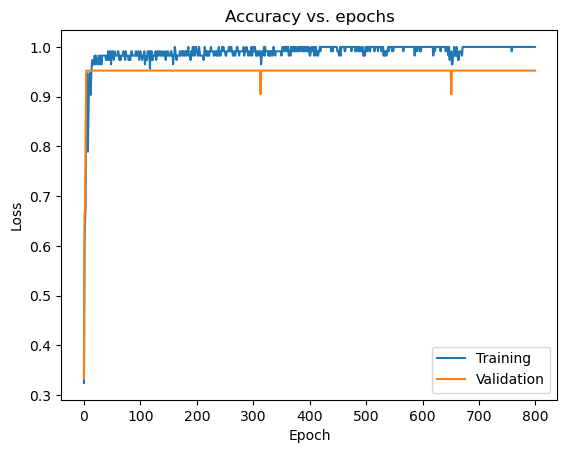

In [66]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

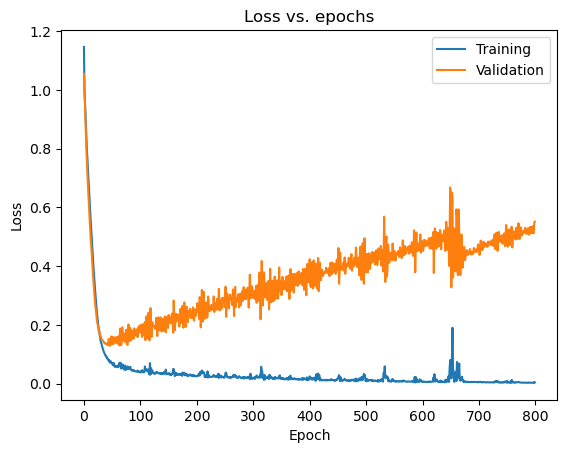

In [67]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

### Regularización de Modelo

In [ ]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    """
    This function should build a regularised Sequential model according to the above specification. 
    The dropout_rate argument in the function should be used to set the Dropout rate for all Dropout layers.
    L2 kernel regularisation (weight decay) should be added using the weight_decay argument to 
    set the weight decay coefficient in all Dense layers that use L2 regularisation.
    Ensure the weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument input_shape.
    Your function should return the model.
    """
    
    reg_model = Sequential() # crear modelo Sequential  FFNN
    
    # input layer: 64 neuronas, activation='relu', input_shape=(x_train.shape[1],)
    reg_model.add(Dense(64, activation='relu', input_shape=(input_shape), kernel_initializer='he_uniform', bias_initializer='ones', kernel_regularizer=regularizers.l2(weight_decay)))
    
    # agregar 4 capas de 128 neuronas 
    reg_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 128 neuronas, activation='relu'
    reg_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 128 neuronas, activation='relu'
    
    reg_model.add(Dropout(dropout_rate)) # Reg: capa Dropout
   
    reg_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 128 neuronas, activation='relu'
    reg_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 128 neuronas, activation='relu'
    
    reg_model.add(BatchNormalization()) # Reg: capa BatchNormalization
    
    # agregar 4 capas de 64 neuronas
    reg_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 64 neuronas, activation='relu'
    reg_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 64 neuronas, activation='relu'
    
    reg_model.add(Dropout(dropout_rate)) # Reg: capa Dropout
    
    reg_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 64 neuronas, activation='relu'
    reg_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay))) # 64 neuronas, activation='relu'
    
    # output layer: 3 neuronas, activation='softmax'
    reg_model.add(Dense(3, activation='softmax')) # 3 neuronas, activation='relu'
    
    reg_model.summary()
    
    return reg_model

    
reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)    

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                320       
                                                                 
 dense_41 (Dense)            (None, 128)               8320      
                                                                 
 dense_42 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 128)               16512     
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)              

In [ ]:
# compilar modelo
compile_model1(reg_model)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                320       
                                                                 
 dense_41 (Dense)            (None, 128)               8320      
                                                                 
 dense_42 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 128)               16512     
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)              

In [ ]:
# entrenar modelo

reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 [==============================] - 11s 1s/step - loss: 2.2904 - accuracy: 0.3158 - val_loss: 2.0232 - val_accuracy: 0.4286
Epoch 2/800
3/3 [==============================] - 0s 95ms/step - loss: 2.2056 - accuracy: 0.3158 - val_loss: 2.0123 - val_accuracy: 0.4286
Epoch 3/800
3/3 [==============================] - 0s 66ms/step - loss: 2.2178 - accuracy: 0.3509 - val_loss: 2.0039 - val_accuracy: 0.4286
Epoch 4/800
3/3 [==============================] - 0s 78ms/step - loss: 2.1822 - accuracy: 0.3246 - val_loss: 1.9979 - val_accuracy: 0.4286
Epoch 5/800
3/3 [==============================] - 0s 68ms/step - loss: 2.1833 - accuracy: 0.3246 - val_loss: 1.9909 - val_accuracy: 0.4286
Epoch 6/800
3/3 [==============================] - 0s 50ms/step - loss: 2.1808 - accuracy: 0.3070 - val_loss: 1.9845 - val_accuracy: 0.4286
Epoch 7/800
3/3 [==============================] - 0s 86ms/step - loss: 2.1133 - accuracy: 0.3333 - val_loss: 1.9801 - val_accuracy: 0.4286
Epoch 8/800
3/3 [====

### Curvas de Aprendizaje: Accuracy y Loss

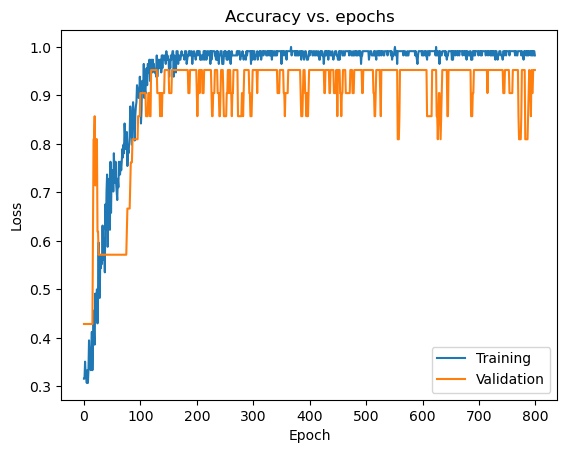

In [ ]:
#Run this cell to plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

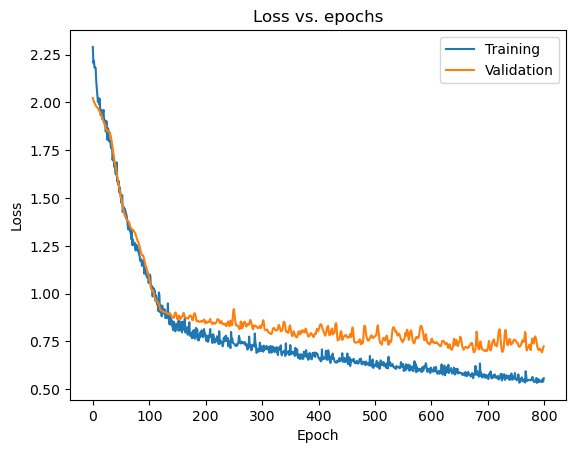

In [ ]:
#Run this cell to plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

### Callbacks

In [68]:
def get_callbacks():
    """
    This function should create and return a tuple (early_stopping, learning_rate_reduction) callbacks.
    The callbacks should be instantiated according to the above requirements.
    """
    
    # crear EarlyStopping callback
    # parametros: monitor='val_loss', mode='min', patience=30
    early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=30)

    # crear ReduceLROnPlateau callback
    # parametros: monitor='val_loss', factor=0.2, patience=20
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20)

    return early_stopping, learning_rate_reduction



In [ ]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model1(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 64)                320       
                                                                 
 dense_71 (Dense)            (None, 128)               8320      
                                                                 
 dense_72 (Dense)            (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_73 (Dense)            (None, 128)               16512     
                                                                 
 dense_74 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_4 (Bat  (None, 128)              

In [ ]:
learning_rate_reduction.patience

20

### Curvas de Aprendizaje

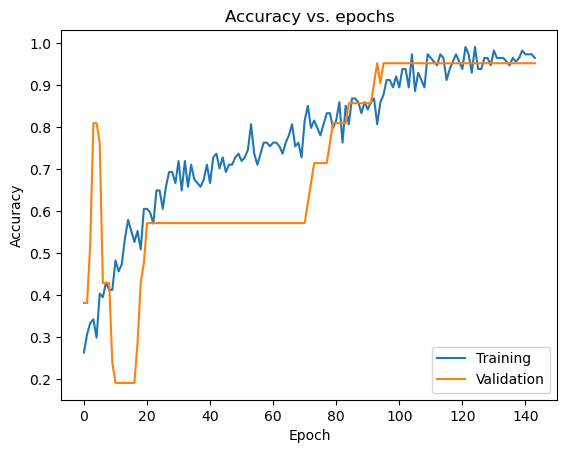

In [ ]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

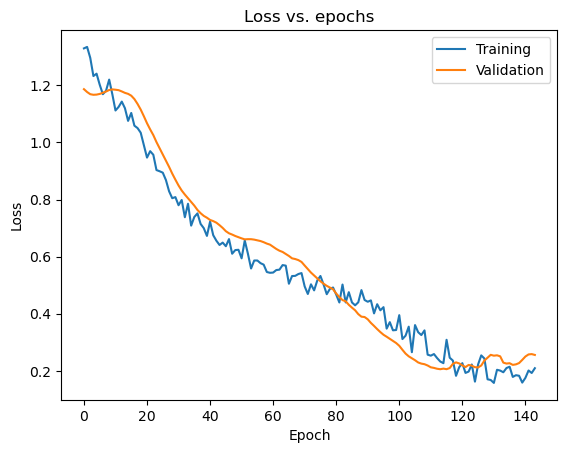

In [ ]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

### Evaluación

In [ ]:
test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.234
Test accuracy: 93.33%


## Guardar y cargar modelos

### Cargar bases de datos

In [13]:
def load_cifar():
    
    # cargar base de datos CIFAR-10
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    # re-escalar pixeles
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    x_train = x_train[:10000]
    y_train = y_train[:10000]
    x_test = x_test[:1000]
    y_test = y_test[:1000]
    
    
        

In [14]:
# Import the CIFAR-10 dataset and rescale the pixel values

# cargar base de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train


array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

### Preprocesamiento:

* Re-escalar pixeles
* Muestrear datos

In [15]:
# re-escalar pixeles
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

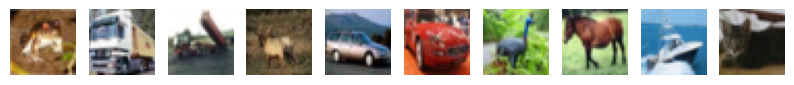

In [16]:
# plot imagenes
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

### Funciones:

* Test Accuracy
* Construir modelo


In [70]:
# evaluar modelo: loss y accuracy en test-set 
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [18]:
# construir modelo CNN

# arquitectura
# input layer:  Conv, filters=16, input_shape=(32, 32, 3), kernel_size=(3, 3)

# capa Conv, filters=8, activation='relu', kernel_size=(3, 3)
# capa pooling: pool_size=(4, 4)
# capa flatten: 1xN
# capas Densa: 32 neuronas, activation='relu'

# output layer:  Densa, 10 neuronas, activation='softmax'

# compilar modelo
# parametros: optimizer='adam', loss='sparse_categorical_crossentropy', metrica= 'accuracy'

def get_new_model():
    model = Sequential([
        Conv2D(filters=16, input_shape=(32, 32, 3), kernel_size=(3, 3), 
               activation='relu', name='conv_1'),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
        MaxPooling2D(pool_size=(4, 4), name='pool_1'),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu', name='dense_1'),
        Dense(units=10, activation='softmax', name='dense_2')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model

In [19]:
model  = get_new_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14514 (56.70 KB)
Trainable params: 14514

In [20]:
# evaluar modelo
get_test_accuracy(model, x_test, y_test)

accuracy: 0.105


### Checkpoints

In [21]:
# crear checkpoint
checkpoint_path = 'model_checkpoints/chekpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             frequency = 'epoch',
                             save_weights_only = True,
                             verbose=1)

checkpoint

### Entrenamiento

In [22]:
# entrenar modelo con Checkpoint Callback
model.fit(x_train, y_train, epochs=3,callbacks=[checkpoint])

Epoch 1/3
312/313 [============================>.] - ETA: 0s - loss: 1.9700 - accuracy: 0.2668
Epoch 1: saving model to model_checkpoints\chekpoint
313/313 [==============================] - 19s 48ms/step - loss: 1.9700 - accuracy: 0.2670
Epoch 2/3
312/313 [============================>.] - ETA: 0s - loss: 1.6324 - accuracy: 0.3985
Epoch 2: saving model to model_checkpoints\chekpoint
313/313 [==============================] - 14s 45ms/step - loss: 1.6327 - accuracy: 0.3986
Epoch 3/3
313/313 [==============================] - ETA: 0s - loss: 1.5063 - accuracy: 0.4518
Epoch 3: saving model to model_checkpoints\chekpoint
313/313 [==============================] - 15s 47ms/step - loss: 1.5063 - accuracy: 0.4518


### Evaluar modelo

In [23]:
# evaluar accuracy de modelo en test-set
get_test_accuracy(model, x_test, y_test)


accuracy: 0.457


In [24]:
# crear nuevo modelo
model = get_new_model() # crear CNN
get_test_accuracy(model, x_test, y_test) # evaluar accuracy de modelo


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14514 (56.70 KB)
Trainable params: 14514

In [25]:
# cargar pesos de modelo pre-entrenado
model.load_weights(checkpoint_path) # cargar pesos a CNN con modelo pre-entrenado
get_test_accuracy(model, x_test, y_test) # evaluar modelo pre-entrenado cargado


accuracy: 0.457


## Checkpoints

In [26]:

# crear Checkpoint Callback
checkpoint_5000_path = 'model_checkpoints_5000/checkp_{epoch:02d}_{batch:04d}'

#  filepath=path, guardar solo los pesos, save_freq = 5000 
checkpoint_5000= ModelCheckpoint(filepath=checkpoint_5000_path,
                                       save_weights_only= True,
                                       save_freq = 5000,
                                       verbose=1)
checkpoint_5000

In [27]:
# crear modelo CNN 
model_check1 = get_new_model() # crear modelo CNN

# entrenar modelo con Checkpoint Callback
model_check1.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test), batch_size=10, callbacks=[checkpoint_5000])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14514 (56.70 KB)
Trainable params: 14514

In [84]:
# crear modelo sin entrenar
model_untrain = get_new_model()
model_untrain


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14514 (56.70 KB)
Trainable params: 14514

In [85]:
# crear Checkpoint Callback que monitorea la accuracy en validacion

checkp_best_path = 'model_checkpoints_best/checkpoint' # path de Checkpoin

# crear Checkpoint Callback
# parametros: guardar solo pesos de modelo, monitorear val_accuracy, guardar SOLO mejor modelo

checkp_best = ModelCheckpoint(filepath=checkp_best_path,
                              save_weights_only = True,
                              save_freq='epoch',
                              monitor='val_accuracy',
                              save_best_only = True,
                              verbose = 1)
checkp_best


In [86]:
# entrenar modelo y guardar pesos con mayor val_accuracy
history = model_untrain.fit(x_train, y_train,
                            epochs=50,
                            validation_data = (x_test, y_test),
                            batch_size= 10,
                            callbacks = [checkp_best],
                            verbose=1)


Epoch 1/50
 999/1000 [============================>.] - ETA: 0s - loss: 1.8638 - accuracy: 0.3154
Epoch 1: val_accuracy improved from -inf to 0.43200, saving model to model_checkpoints_best\checkpoint
1000/1000 [==============================] - 22s 18ms/step - loss: 1.8636 - accuracy: 0.3155 - val_loss: 1.6036 - val_accuracy: 0.4320
Epoch 2/50
1000/1000 [==============================] - ETA: 0s - loss: 1.5345 - accuracy: 0.4421
Epoch 2: val_accuracy improved from 0.43200 to 0.45400, saving model to model_checkpoints_best\checkpoint
1000/1000 [==============================] - 20s 20ms/step - loss: 1.5345 - accuracy: 0.4421 - val_loss: 1.4826 - val_accuracy: 0.4540
Epoch 3/50
 999/1000 [============================>.] - ETA: 0s - loss: 1.4015 - accuracy: 0.4996
Epoch 3: val_accuracy improved from 0.45400 to 0.49000, saving model to model_checkpoints_best\checkpoint
1000/1000 [==============================] - 21s 21ms/step - loss: 1.4013 - accuracy: 0.4996 - val_loss: 1.4253 - val_acc

KeyboardInterrupt: 

<Axes: >

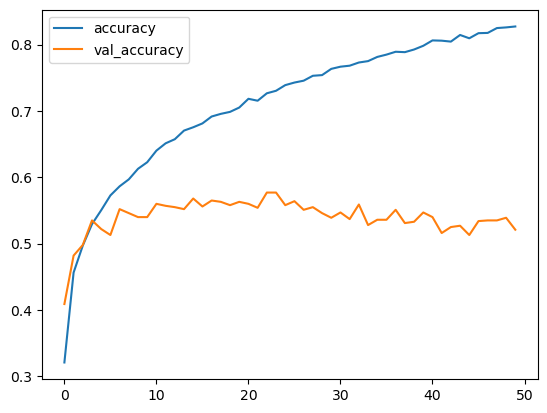

In [ ]:
# evaluar modelo
df = pd.DataFrame(history.history)
df.plot(y=['accuracy','val_accuracy'])


### Guardar modelo completo

In [57]:
# cargar base de datos CIFAR-10
load_cifar()


NameError: name 'load_cifar' is not defined

In [ ]:
# crear 

chckp_path1 = 'model_checkp'
checkp1 = ModelCheckpoint(filepath=chckp_path1,
                          save_weights=False,
                          frequency='epoch',
                          verbose=1)

checkp1


In [ ]:
# crear y entrenar modelo
m_save1 = get_new_model()
m_save1.fit(x_train,y_train,epochs=3,callbacks=[checkp1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 28, 28, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 7, 7, 8)           0         
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                12576     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 14514 (56.70 KB)
Trainable params: 14514

INFO:tensorflow:Assets written to: model_checkp\assets


313/313 [==============================] - 29s 79ms/step - loss: 2.0033 - accuracy: 0.2661
Epoch 2/3
313/313 [==============================] - ETA: 0s - loss: 1.5795 - accuracy: 0.4267
Epoch 2: saving model to model_checkp
INFO:tensorflow:Assets written to: model_checkp\assets


INFO:tensorflow:Assets written to: model_checkp\assets


313/313 [==============================] - 18s 59ms/step - loss: 1.5795 - accuracy: 0.4267
Epoch 3/3
312/313 [============================>.] - ETA: 0s - loss: 1.4337 - accuracy: 0.4844
Epoch 3: saving model to model_checkp
INFO:tensorflow:Assets written to: model_checkp\assets


INFO:tensorflow:Assets written to: model_checkp\assets


313/313 [==============================] - 23s 73ms/step - loss: 1.4337 - accuracy: 0.4845


In [ ]:
# evaluar modelo
get_test_accuracy(m_save1, x_test, y_test)

accuracy: 0.501


In [ ]:
del m_save1 # eliminar modelo

In [ ]:
# cargar modelo y evaluar modelo
model = load_model(chckp_path1)
get_test_accuracy(model, x_test, y_test)



accuracy: 0.501


### Guardar modelo en formato .h5

In [ ]:
model.save('m1.h5') # guardar modelo en formato .h5
load_model1 = load_model('m1.h5') # cargar modelo guardado
get_test_accuracy(load_model1, x_test, y_test) # evaluar modelo guardado

c:\Users\Diego\miniconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


accuracy: 0.501


### Guardar arquitectura de modelo

In [ ]:
# obtener arquitectura (config) del modelo
arqui = model.get_config()

# crear modelo con arquitectura por parametro
new_model_arqui1 = tf.keras.Sequential.from_config(arqui)

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'conv_1_input'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv_1',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 32, 32, 3),
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint'

In [ ]:
# guardar arquitectura en formatos JSON y YAML
json_arqu = model.to_json()
#yaml_string = model.to_yaml()


# Write out JSON config file

with open('config.json', 'w') as f:
    json.dump(json_arqu, f)
del json_arqu

# Read in JSON config file again

with open('config.json', 'r') as f:
    json_arqu = json.load(f)


## Cargar modelo pre-entrenados en Keras

In [3]:
# modelo RestNet 50 pre-entrenado de Keras
model_res50 = ResNet50(weights='imagenet')
model_res50.summary()

102967424/102967424 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

In [9]:
# importar, cargar y preprocesamiento de 3 imagenes de prueba para clasificación
lemon_img = load_img('lemon.jpg', target_size=(224, 224))
viaduct_img = load_img('viaduct.jpg', target_size=(224, 224))
water_tower_img = load_img('water_tower.jpg', target_size=(224, 224))


In [10]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# generar top 5 predicciones
def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] # convertir x a array
    x = preprocess_input(x) # preprocesar imagen
    
    # top5 predicciones
    preds = decode_predictions(model_res50.predict(x), top=5) 
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        # mostrar prediccion y probabilidad
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds



### Predicciones 


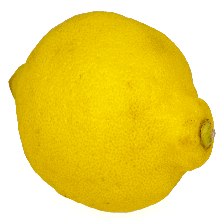

In [11]:
lemon_img

In [12]:
get_top_5_predictions(lemon_img)

35363/35363 [==============================] - 0s 0us/step


,prediction,probability
1,lemon,0.994783
2,tennis_ball,0.004434
3,orange,0.000595
4,ping-pong_ball,0.000032
5,banana,0.000023


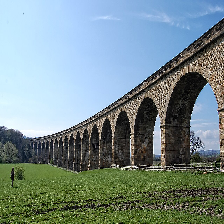

In [13]:
viaduct_img

In [14]:
get_top_5_predictions(viaduct_img)

1/1 [==============================] - 0s 98ms/step


,prediction,probability
1,viaduct,0.999948
2,steel_arch_bridge,0.000029
3,pier,0.000011
4,bell_cote,0.000006
5,dam,0.000001


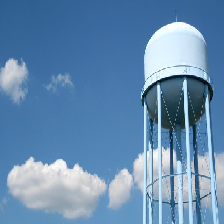

In [15]:
water_tower_img

In [23]:
get_top_5_predictions(water_tower_img)

1/1 [==============================] - 0s 132ms/step


,prediction,probability
1,water_tower,0.999969
2,chime,0.000023
3,spotlight,0.000002
4,airship,0.000001
5,beacon,0.000001


In [24]:
colibri_img = load_img('colibri.jpg', target_size=(224, 224))
get_top_5_predictions(colibri_img)

1/1 [==============================] - 0s 120ms/step


,prediction,probability
1,hummingbird,0.999707
2,fly,0.000149
3,jacamar,0.000132
4,peacock,0.000008
5,bee_eater,0.000002


### Predicciones de muestra

In [ ]:
#colibri_img = load_img('colibri.jpg', target_size=(224, 224))
#get_top_5_predictions(colibri_img)

## TensorFlow Hub

In [19]:
# cargar modelo de Google MobileNet V1 de TensorFlow Hub
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1343049   
                                                                 
Total params: 1343049 (5.12 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1343049 (5.12 MB)
_________________________________________________________________


In [ ]:
# importar, cargar y preprocesamiento de 3 imagenes de prueba para clasificación
lemon_img = load_img('lemon.jpg', target_size=(160,160))
viaduct_img = load_img('viaduct.jpg', target_size=(160,160))
water_tower_img = load_img('water_tower.jpg', target_size=(160,160))


## Guardar y cargar modelos pre-entrenados con CNN para clasificación de imágenes satelitales

### Cargar bases de datos

In [22]:
def load_eurosat_data():
    data_dir = ''
    x_train = np.load(os.path.join(data_dir, 'x_train.npy'))
    y_train = np.load(os.path.join(data_dir, 'y_train.npy'))
    x_test  = np.load(os.path.join(data_dir, 'x_test.npy'))
    y_test  = np.load(os.path.join(data_dir, 'y_test.npy'))
    return (x_train, y_train), (x_test, y_test)



### Preprocesamiento

In [21]:
(x_train, y_train), (x_test, y_test) = load_eurosat_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train[0].shape)
print(x_train.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'x_train.npy'

### Construir modelo

In [17]:

def get_new_model(input_shape):
    model = Sequential() # crear modelo
    
    # input layer: capa convolucional 16 filtros, input_shape=input_shape, kernel 3x3
    # activation='relu', padding SAME
    model.add(Conv2D(filters=16, input_shape=input_shape, kernel_size=(3, 3), 
               activation='relu', padding='same', name='conv_1'))
    
    # capa convolucional: capa convolucional 8 filtros, kernel 3x3
    # activation='relu', padding SAME
    model.add(Conv2D(filters=8, kernel_size=(3, 3), 
               activation='relu', padding='same', name='conv_2'))
   
    # capa pooling(regularizacion): tamaño de pool 4x4
    model.add(MaxPooling2D(pool_size=(8, 8), name='pool_1'))
    
    # capa Flatten: 1xN
    model.add(Flatten(name='flatten')) 
    
    # capa Densa: 32 neuronas, activation='relu' 
    model.add(Dense(32,activation='relu',name='dense_1'))
    
    # output layer: 10 neuronas, activation='softmax'
    model.add(Dense(10,activation='softmax',name='dense_2'))
    
    # compilar modelo
    # parametros: optimizer='adam', loss='sparse_categorical_crossentropy', evaluacion accuracy
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model
    
model = get_new_model(x_train[0].shape)
    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 64, 64, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 8, 8, 8)           0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                16416     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 18354 (71.70 KB)
Trainable params: 18354

In [7]:
# evaluar modelo
get_test_accuracy(model, x_test, y_test)


accuracy: 0.108


### Checkpoints



In [22]:

def get_checkpoint_every_epoch():
    """
    This function should return a ModelCheckpoint object that:
    - saves the weights only at the end of every epoch
    - saves into a directory called 'checkpoints_every_epoch' inside the current working directory
    - generates filenames in that directory like 'checkpoint_XXX' where
      XXX is the epoch number formatted to have three digits, e.g. 001, 002, 003, etc.
    """
    # crear Checkpoint Callback
    checkpoint_filename = './checkpoints_every_epoch/checkpoint_{epoch:03d}' # path
    
    #checkpoint_filename =  checkpoint_dir + '/checkpoint_{epoch:03d}' # nombre del archivo
    
    #checkpoint_path = '/checkpoint_{epoch:03d}'
    
    # crear directorio de Checkpoints 
    #os.makedirs(checkpoint_dir, exist_ok=True)
    
    # crear Checkpoint:
    # filepath=checkpoint_filename, save_weights_only=True en cada epoch
    checkpoint = ModelCheckpoint(filepath=checkpoint_filename,
                                 save_weights_only=True,
                                 save_freq='epoch')
    return checkpoint
    
def get_checkpoint_best_only():
    """
    This function returns a ModelCheckpoint object that:
    - saves only the weights that generate the highest validation (testing) accuracy
    - saves into a directory called 'checkpoints_best_only' inside the current working directory
    - generates a file called 'checkpoints_best_only/checkpoint'
    """
    checkpoint_filename = './checkpoints_best_only/best_checkpoint'
    #checkpoint_filename = checkpoint_dir + '/checkpoint'
    
    #checkpoint_path = '/checkpoint'

    # Create the directory if it doesn't exist
    #os.makedirs(checkpoint_dir, exist_ok=True)
    
    # Create and return the ModelCheckpoint object with 'save_best_only' set to True
    checkpoint = ModelCheckpoint(filepath=checkpoint_filename,
                                 save_weights_only=True, 
                                 save_best_only=True,
                                 monitor='val_accuracy',
                                 mode='max',
                                 save_freq='epoch',
                                 save_best_freq='epoch', 
                                 verbose=1, 
                                 validation_data=(x_test, y_test))
    return checkpoint

    
def get_early_stopping():
    """
    This function should return an EarlyStopping callback that stops training when
    the validation (testing) accuracy has not improved in the last 3 epochs.
    """
    checkpoint = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')
    return checkpoint

In [23]:
# crear Checkpoints callbacks
# crear directorio de Checkpoints 

checkpoint_every_epoch = get_checkpoint_every_epoch()
checkpoint_best_only = get_checkpoint_best_only()
early_stopping = get_early_stopping()

checkpoint_every_epoch

### Entrenar modelo

In [24]:
# lista de Checkpoint Callbacks
callbacks = [checkpoint_every_epoch, checkpoint_best_only, early_stopping]
# entrenar modelo    con lista de Callback
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=callbacks)

Epoch 1/50
125/125 [==============================] - ETA: 0s - loss: 1.9442 - accuracy: 0.2840
Epoch 1: val_accuracy improved from -inf to 0.42000, saving model to ./checkpoints_best_only\best_checkpoint
125/125 [==============================] - 32s 205ms/step - loss: 1.9442 - accuracy: 0.2840 - val_loss: 1.6482 - val_accuracy: 0.4200
Epoch 2/50
125/125 [==============================] - ETA: 0s - loss: 1.5171 - accuracy: 0.4498
Epoch 2: val_accuracy improved from 0.42000 to 0.49700, saving model to ./checkpoints_best_only\best_checkpoint
125/125 [==============================] - 27s 214ms/step - loss: 1.5171 - accuracy: 0.4498 - val_loss: 1.4094 - val_accuracy: 0.4970
Epoch 3/50
125/125 [==============================] - ETA: 0s - loss: 1.3715 - accuracy: 0.4952
Epoch 3: val_accuracy improved from 0.49700 to 0.51500, saving model to ./checkpoints_best_only\best_checkpoint
125/125 [==============================] - 23s 181ms/step - loss: 1.3715 - accuracy: 0.4952 - val_loss: 1.3108 

In [11]:
def get_model_last_epoch(model):
    """
    This function should create a new instance of the CNN you created earlier,
    load on the weights from the last training epoch, and return this model.
    """
    
    model_last_epoch = clone_model(model)
    latest_checkpoint = tf.train.latest_checkpoint('checkpoints_every_epoch')
    model_last_epoch.load_weights(latest_checkpoint)
    
    return model_last_epoch
    
    
    
def get_model_best_epoch(model):
    """
    This function should create a new instance of the CNN you created earlier, load 
    on the weights leading to the highest validation accuracy, and return this model.
    """
    
    model_best_epoch = clone_model(model)
    best_checkpoint = tf.train.latest_checkpoint('checkpoints_best_only')
    model_best_epoch.load_weights(best_checkpoint)
    
    return model_best_epoch

In [12]:
model_last_epoch = get_model_last_epoch(get_new_model(x_train[0].shape))
model_best_epoch = get_model_best_epoch(get_new_model(x_train[0].shape))
print('Model with last epoch weights:')
get_test_accuracy(model_last_epoch, x_test, y_test)
print('')
print('Model with best epoch weights:')
get_test_accuracy(model_best_epoch, x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv_2 (Conv2D)             (None, 64, 64, 8)         1160      
                                                                 
 pool_1 (MaxPooling2D)       (None, 16, 16, 8)         0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                65568     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 67506 (263.70 KB)
Trainable params: 6750

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

## Image Classifier of digit SVHN dataset (Google Street View Images)

### Cargar bases de datos

Base de datos SVHN digit images  - 600,000 observaciones

In [8]:
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

### Preprocesamiento

* Separar x variables, y dependiente
* Escalar base de datos 
* Agregar canal 'dummy'
* Convertir imagenes a escala de grises



In [9]:
# separar x variables (pixeles), y dependiente 
x_train = train['X']
y_train = train['y']

x_test = test['X']
y_test = test['y']

# tamaño de train-set y test-set
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(32, 32, 3, 73257) (73257, 1)
(32, 32, 3, 26032) (26032, 1)


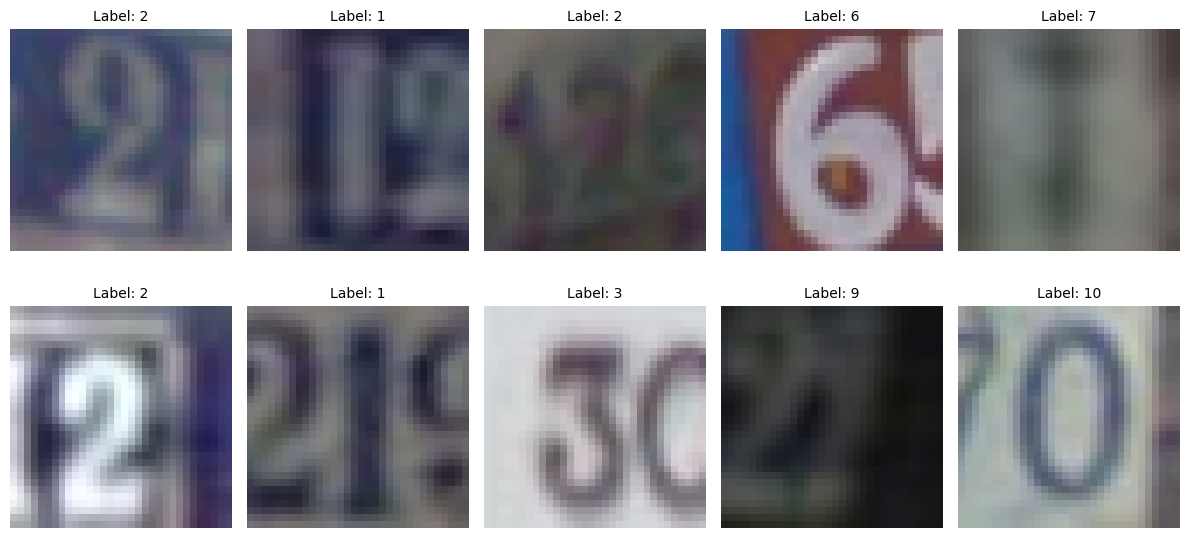

In [10]:

# Function to display images and labels
def display_images(images, labels, num_samples=10):
    idxs = np.random.randint(0, images.shape[3], num_samples)
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[:, :, :, idx])
        plt.title(f"Label: {labels[idx][0]}", fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Display a random sample of training images and labels
display_images(x_train, y_train)


In [11]:
# escalar/estandarizar x_train, x_test en rango [0-1]
def escalar_datos(train_images, test_images):
    
    # Reshape  y normalizar x_train y x_test
    x_train_scaled = train_images / 255.0
    x_test_scaled = test_images / 255.0
    
    return (x_train_scaled, x_test_scaled)

scaled_train_images, scaled_test_images=escalar_datos(x_train, x_test)

print(scaled_train_images.shape,y_train.shape)
print(scaled_test_images.shape,y_test.shape)

(32, 32, 3, 73257) (73257, 1)
(32, 32, 3, 26032) (26032, 1)


In [42]:
# Add a dummy channel dimension
# agregar dimension 'dummy'

#scaled_train_images = scaled_train_images[..., np.newaxis]
#scaled_test_images = scaled_test_images[..., np.newaxis]
#scaled_train_images.shape 

(32, 32, 3, 73257, 1)

In [103]:
# convertir a escala de grises
x_train_gray = np.mean(scaled_train_images, axis=2, keepdims=True)
x_test_gray = np.mean(scaled_test_images, axis=2, keepdims=True)

print(x_train_gray.shape,y_train.shape)
print(x_test_gray.shape,y_test.shape)


(32, 32, 1, 73257) (73257, 1)
(32, 32, 1, 26032) (26032, 1)


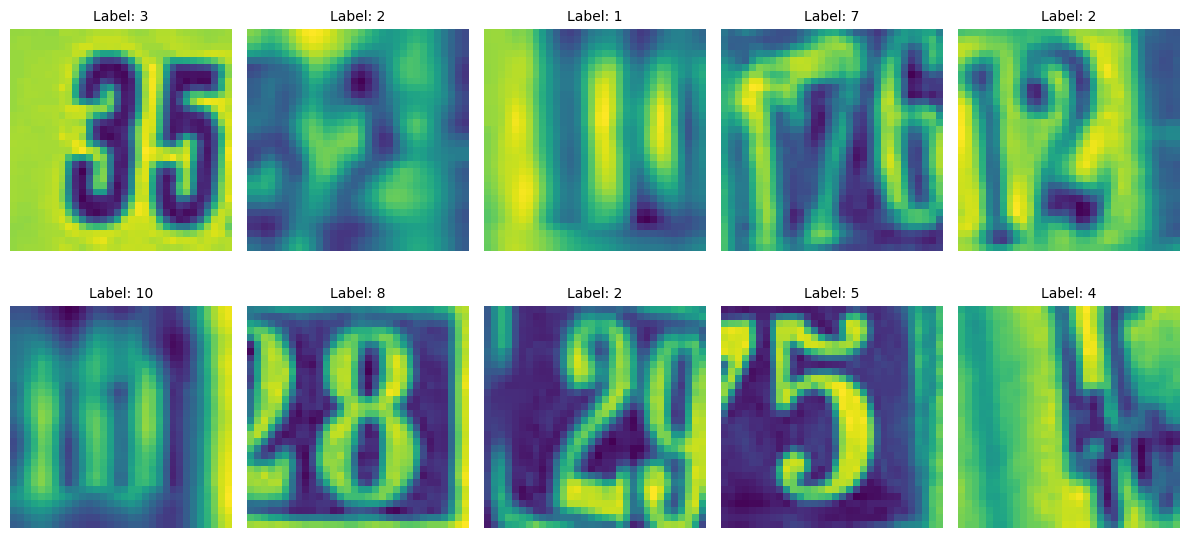

In [104]:
# Display a random sample of training images and labels
display_images(x_train_gray, y_train)

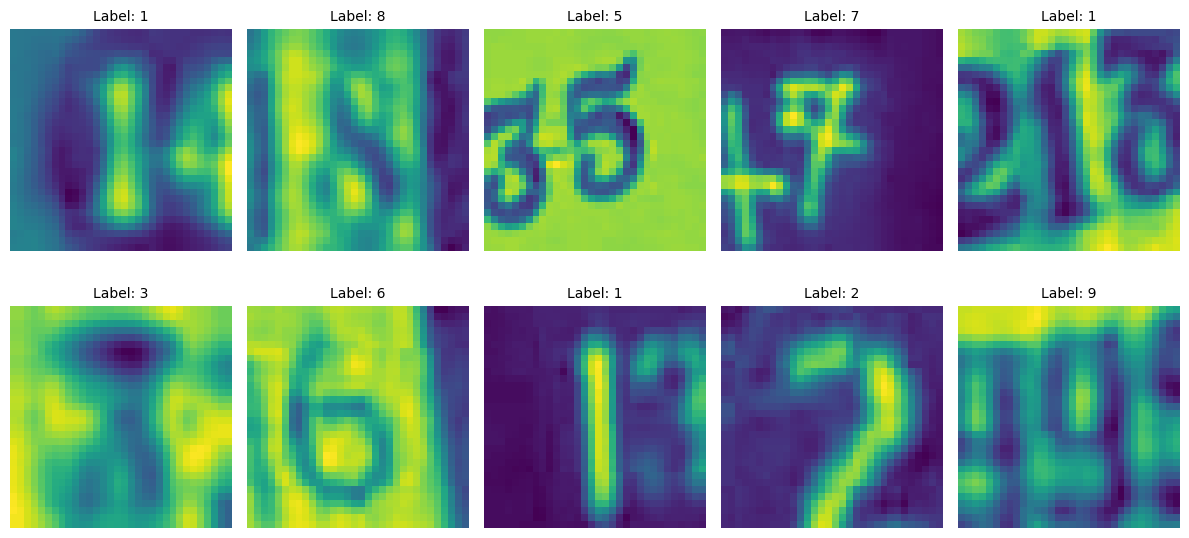

In [105]:
# Display a random sample of training images and labels
display_images(x_test_gray, y_test)

In [106]:
x_train_gray.shape

(32, 32, 1, 73257)

In [107]:
x_train_gray.shape[:3]

(32, 32, 1)

### Construir modelo MLP

In [111]:

def construir_MLP(input_shape):
    
    model = Sequential() # crear modelo MLP
    
    # input layer: 
    # input layer: capa Densa,  128 neuronas, input_shape=input_shape, activacion= 'relu'
    #model.add(Dense(128, activation='relu', input_shape=input_shape, name='input_layer'))    
    model.add(Flatten(input_shape=input_shape)) # (1,N) capa Flatten
    
    
    # agregar capas
    model.add(Dense(128, activation='relu')) #capa Densa,  128 neuronas,  activacion= 'relu'
    model.add(Dense(64, activation='relu')) #capa Densa,  64 neuronas,  activacion= 'relu'
    model.add(Dense(64, activation='relu')) #capa Densa,  64 neuronas,  activacion= 'relu'
    #model.add(Flatten()) # (1,N) capa Flatten
    
    # output layer: 10 neuronas, activation='softmax'
    model.add(Dense(10,activation='softmax',name='output_layer')) # #capa Densa,  10 neuronas,  activacion= 'softmax'
    
    
    # compilar modelo
    # parametros: optimizer='adam', loss='sparse_categorical_crossentropy', evaluacion accuracy
    model.compile(optimizer='adam',
                  loss=['sparse_categorical_crossentropy','mse'],
                  metrics=['accuracy','recall','precision'])
    model.summary()
    return model

model = construir_MLP( x_train_gray.shape[:3] )

# input shape
# x_train.shape[1],
#scaled_train_images[0].shape

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 1024)              0         
                                                                 
 dense_29 (Dense)            (None, 128)               131200    
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 144266 (563.54 KB)
Trainable params: 144266 (563.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Callbacks

In [5]:
def get_checkpoint_best_only1():
    """
    This function returns a ModelCheckpoint object that:
    - saves only the weights that generate the highest validation (testing) accuracy
    - saves into a directory called 'checkpoints_best_only' inside the current working directory
    - generates a file called 'checkpoints_best_only/checkpoint'
    """
    checkpoint_dir = 'checkpoints_best_only'
    checkpoint_filename = checkpoint_dir + '/checkpoint'
    
    #checkpoint_path = '/checkpoint'

    # Create the directory if it doesn't exist
    os.makedirs(checkpoint_dir, exist_ok=True)
    
    # Create and return the ModelCheckpoint object with 'save_best_only' set to True
    checkpoint = ModelCheckpoint(filepath=checkpoint_filename, 
                                 save_weights_only=True, 
                                 save_best_only=True, 
                                 monitor='val_accuracy', 
                                 mode='max')
    return checkpoint

    
def get_early_stopping1():
    """
    This function should return an EarlyStopping callback that stops training when
    the validation (testing) accuracy has not improved in the last 3 epochs.
    """
    checkpoint = EarlyStopping(monitor='val_accuracy', patience=5, mode='max')
    return checkpoint

In [6]:
# crear Checkpoints callbacks
checkpoint_best_only1 = get_checkpoint_best_only1()
early_stopping1 = get_early_stopping1()

checkpoint_best_only1

### Entrenamiento

In [7]:
print(x_train_gray.shape,y_train.shape)

NameError: name 'x_train_gray' is not defined

In [114]:
# Transpose the dimensions of x_train_gray to (73257, 32, 32, 1)
x_train_gray = np.transpose(x_train_gray, (3, 0, 1, 2))

# Remove the extra dimension from y_train to get (73257,)
y_train = y_train.squeeze()


In [2]:
# lista de Checkpoint Callbacks
callbacks = [checkpoint_best_only1, early_stopping1]
# entrenar modelo con lista de Callback
history = model.fit(x_train_gray, y_train, epochs=20, batch_size=64, validation_split=0.2, validation_data=(x_test, y_test), callbacks=callbacks)

NameError: name 'checkpoint_best_only1' is not defined

### Curvas de aprendizaje

In [ ]:
#Run this cell to plot the accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [ ]:
#Run this cell to plot the loss vs epoch graph

plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

### Evaluación

In [ ]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)